# Survivalibility on Mt. Everest

## Programming for Data Analysis Project 1

## Author: David Higgins - G00411302

"Getting to the top is optional. Getting down is mandatory."

\- Ed Viesturs

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sklearn.linear_model as sk
import scipy.stats as ss

%matplotlib inline

We first import the Mt. Everest Ascent dataset to understand what information is available for mountaineers and to get an idea of the shape of that data.

In [27]:
df = pd.read_csv("Mt_Everest_Ascent_Data.csv")
df.head()

,Peak,Name,Year,Season,Date,Time,Citizenship,Sex,Age,Oxy,Dth,Host
0,EVER,Edmund Percival Hillary,1953,Spr,29-May,11:30,New Zealand,M,33,Y,.,Nepal
1,EVER,Tenzing Norgay,1953,Spr,29-May,11:30,India,M,39,Y,.,Nepal
2,EVER,Hans-Rudolf Von Gunten,1956,Spr,24-May,11:00,Switzerland,M,27,Y,.,Nepal
3,EVER,Juerg P. Marmet,1956,Spr,23-May,14:00,Switzerland,M,28,Y,.,Nepal
4,EVER,Ernst Schmied,1956,Spr,23-May,14:00,Switzerland,M,31,Y,.,Nepal


We will take a subset of the dataframe, all the data from the year 1985 onwards.

In [28]:
df = df.loc[df.loc[:, 'Year'] >= 1985]
df

,Peak,Name,Year,Season,Date,Time,Citizenship,Sex,Age,Oxy,Dth,Host
170,EVER,"Ang Phurba Sherpa (Thami, Khumbu)",1985,Spr,30-Apr,NaN,Nepal,M,23,Y,.,Nepal
171,EVER,Mitsuyoshi Sato,1985,Aut,30-Oct,NaN,Japan,M,24,Y,.,Nepal
172,EVER,Narayan Kumar Shrestha,1985,Sum,28-Aug,18:20,Nepal,M,25,Y,.,China
173,EVER,"Lhakpa Dorje (Ang Lhakpa) Sherpa (Khunde, Khumbu)",1985,Spr,21-Apr,09:30,Nepal,M,26,Y,.,Nepal
174,EVER,"Pema Dorje Sherpa (Khumjung, Khumbu)",1985,Spr,29-Apr,09:25,Nepal,M,26,Y,.,Nepal
...,...,...,...,...,...,...,...,...,...,...,...,...
10005,EVER,Phurbu Dhondup (Big),2020,Spr,27-May,NaN,China,M,43,Y,.,China
10006,EVER,Fu-Qing (Jing-Yang) Li,2020,Spr,27-May,NaN,China,M,43,Y,.,China
10007,EVER,Ci Luo (Tselo),2020,Spr,27-May,NaN,China,M,45,Y,.,China
10008,EVER,Zhou-Ping Cui,2020,Spr,28-May,NaN,China,F,45,Y,.,China


Use linear regression model to determine the number of climbers, N.

The number of climbers in 2023 is 693.


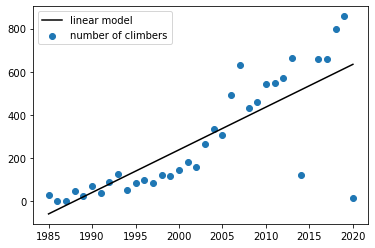

In [29]:
x_train = df['Year'].unique()
x_train = x_train.reshape(-1, 1)
groupedDf = df.groupby('Year').count()
y_train = groupedDf['Name']


regr = sk.LinearRegression()
regr.fit(x_train, y_train)
N = int(regr.predict(np.array(2023).reshape(1,-1)))
print("The number of climbers in 2023 is {}.".format(N))


plt.plot(x_train, regr.predict(x_train),color='k', label='linear model') 
plt.scatter(x_train, y_train, label='number of climbers')
plt.legend()

We can create a Data Series containing just the age values. It's then possible to use the describe() method to find out the mean and standard deviation of the ages of summitters.

In [30]:
ages = df.loc[:,'Age']
ages.describe()

count    9840.000000
mean       35.358841
std         9.348445
min        13.000000
25%        28.000000
50%        34.000000
75%        41.000000
max        80.000000
Name: Age, dtype: float64

Plotting a histogram of the age Data Series gives us an idea of the shape of the distribution. This is often the best indicator of what distribution is appropriate when generating synthetic data.

(array([ 149., 1603., 2858., 2179., 1814.,  828.,  296.,   93.,   17.,
           3.]),
 array([13. , 19.7, 26.4, 33.1, 39.8, 46.5, 53.2, 59.9, 66.6, 73.3, 80. ]),
 <BarContainer object of 10 artists>)

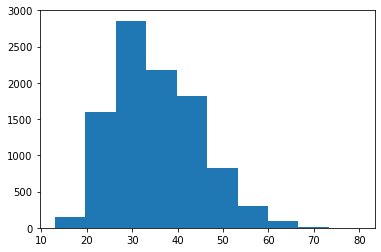

In [31]:
plt.hist(ages, bins=10)

This histogram looks relatively normally distributed. We can try generating a dataset using the mean and standard deviation of the ages Data Series.

In [54]:
rng = np.random.default_rng()
vals = rng.normal(loc = ages.mean(), scale = ages.std(), size = N)
print(vals)

[37.84077198 29.19836507 35.56926657 34.76959692 43.03795647 26.78799133
 30.22824666 39.49122793 27.48097623 28.27384697 16.74633199 32.89774003
 47.65995524 41.55620923 33.13917539 46.1165276  30.32472571 36.34165679
 40.43433078 35.48777191 41.12459881 31.02051312 32.40802184 39.483561
 33.86757386 29.73830266 22.36736376 24.41576215 45.36254308 29.15784563
 37.00480322 36.97378916 28.45159031 46.11925348 49.24688804 33.64250384
 44.08517484 27.51691497 50.06837051 38.43104904 32.29144463 43.16395313
 42.50986571 41.92618591 37.74272638 21.9623369  24.22694212 43.80174931
 37.71665301 23.48940205 40.08266987 32.71242046 35.99286012 59.06159151
 32.54902609 37.05492883 35.66032884 27.40355617 29.66876085 31.37266644
 20.52207086 43.67313105 31.6378671  43.2018895  31.21957824 42.18248833
 45.1257653  62.08635459 46.87461952 27.78909028 39.72899153 33.74083366
 38.63258213 31.50380409 39.33429155 31.69896182 39.83659175 46.72822749
 26.06829866 35.74506994 27.88276862 32.61094335 26.8

No handles with labels found to put in legend.


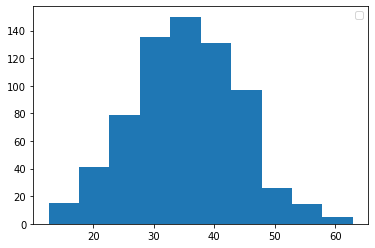

In [71]:
plt.hist(vals, bins=10)

This appears to be a relatively close approximation of the age Data Series so we will use the variable vals to synthesise age data. Next we consider the probability that a summitter climbed without oxygen. 

In [9]:
noOxygen = df.loc[df.loc[:,'Oxy'] == 'No']
noOxygen.head()

,Peak,Name,Year,Season,Date,Time,Citizenship,Sex,Age,Oxy,Dth,Host
190,EVER,Noboru Yamada,1985,Aut,30-Oct,10:00,Japan,M,35,No,.,Nepal
191,EVER,"Ang Rita Sherpa (Yilajung, Khumbu)",1985,Spr,29-Apr,09:25,Nepal,M,36,No,.,Nepal
200,EVER,Erhard Loretan,1986,Sum,30-Aug,14:30,Switzerland,M,27,No,.,China
203,EVER,Jean Fernand Troillet,1986,Sum,30-Aug,14:30,Switzerland,M,38,No,.,China
205,EVER,"Ang Rita Sherpa (Yilajung, Khumbu)",1987,Win,22-Dec,14:20,Nepal,M,39,No,.,Nepal


In [10]:
noOxPotential = df.Age.count() 
noOxPotential

9840

We can look at the historical data to get an idea of the probability that a climber will not use oxygen in their attempt. We can count the number of climbers in total who have used oxygen and divide it by the total number of summitters. We can use this probability with the binomial distribution to generate our synthetic data on oxygen use.

In [11]:
noOxProbability = noOxygen.Age.count() / noOxPotential
noOxProbability

0.019715447154471544

Calculate use of oxygen synthetic data

In [67]:
oxUse = []
for a in vals:
    synNoOx = rng.binomial(1, noOxProbability)
    oxUse.append(synNoOx)
print(oxUse)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [68]:
print("{} summitters used oxygen and {} climbed without oxygen.".format(oxUse.count(0), oxUse.count(1)))

683 summitters used oxygen and 10 climbed without oxygen.


Next we calculate the probabilities of climbing in each season.

In [13]:
sprCount = df.loc[df.loc[:,'Season'] == 'Spr'].Season.count()
sumCount = df.loc[df.loc[:,'Season'] == 'Sum'].Season.count()
autCount = df.loc[df.loc[:,'Season'] == 'Aut'].Season.count()
winCount = df.loc[df.loc[:,'Season'] == 'Win'].Season.count()

sprProb = sprCount / df.Season.count()
sumProb = sumCount / df.Season.count()
autProb = autCount / df.Season.count()
winProb = winCount / df.Season.count()

seasProbs = [sprProb, sumProb, autProb, winProb]
seasProbs

[0.9761178861788617,
 0.0008130081300813008,
 0.02225609756097561,
 0.0008130081300813008]

Generate a set of seasons chosen by each climber in the synthetic dataset. We can use the choices method from the random package, with the probabilities above as the weights, to determine a synthetic dataset reflective of the general choices of climbers. It will be heavily dominated by spring but should a couple of attempts in the autumn. Summer and winter are unlikely to feature unless the size of the dataset, N, is quite large.

In [14]:
seas = ['Spr', 'Sum', 'Aut', 'Win']
seasList = []

for i in range(0, N):
    seasChoice = random.choices(seas, weights=seasProbs)
    seasList.append(seasChoice[0])

print(seasList)

['Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr'

In [70]:
print("There were {} summits in spring, {} summits in summer, {} summits in autumn and {} summits in winter."\
      .format(seasList.count('Spr'), seasList.count('Sum'), seasList.count('Aut'), seasList.count('Win')))

There were 678 summits in spring, 0 summits in summer, 15 summits in autumn and 0 summits in winter.


Calculate the probabilities of surviving for summitting in each season with and without oxygen. Again we will use these probabilities with the binomial distribution as we are considering a binary choice, either surviving or not.

In [15]:
for i in seas:
    NoOxDeathProb = round(df[(df['Season'] == i) & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == i) & (df['Oxy'] == 'No')].Season.count(),2)
    print('The historical probability of death after summitting when climbing without oxygen in {} is {}'.format(i,NoOxDeathProb))
    OxDeathProb = round(df[(df['Season'] == i) & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == i) & (df['Oxy'] == 'Y')].Season.count(),2)
    print('The historical probability of death after summitting when climbing with oxygen in {} is {}'.format(i,OxDeathProb))


The historical probability of death after summitting when climbing without oxygen in Spr is 0.05
The historical probability of death after summitting when climbing with oxygen in Spr is 0.01
The historical probability of death after summitting when climbing without oxygen in Sum is 0.0
The historical probability of death after summitting when climbing with oxygen in Sum is 0.0
The historical probability of death after summitting when climbing without oxygen in Aut is 0.06
The historical probability of death after summitting when climbing with oxygen in Aut is 0.01
The historical probability of death after summitting when climbing without oxygen in Win is 0.0
The historical probability of death after summitting when climbing with oxygen in Win is 0.0


Compile list with climber number, ages, season and oxygen use.

In [16]:
synEverestData = []

def everestFunction():
    for i in range(0, N):
        data = []
        if oxUse[i] == 0 and seasList[i] == 'Spr':
            death = rng.binomial(1, df[(df['Season'] == 'Spr') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Spr') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Spr':
            death = rng.binomial(1, df[(df['Season'] == 'Spr') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Spr') & (df['Oxy'] == 'Y')].Season.count())

        elif oxUse[i] == 0 and seasList[i] == 'Sum':
            death = rng.binomial(1, df[(df['Season'] == 'Sum') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Sum') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Sum':
            death = rng.binomial(1, df[(df['Season'] == 'Sum') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Sum') & (df['Oxy'] == 'Y')].Season.count())

        elif oxUse[i] == 0 and seasList[i] == 'Aut':
            death = rng.binomial(1, df[(df['Season'] == 'Aut') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Aut') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Aut':
            death = rng.binomial(1, df[(df['Season'] == 'Aut') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Aut') & (df['Oxy'] == 'Y')].Season.count())

        elif oxUse[i] == 0 and seasList[i] == 'Win':
            death = rng.binomial(1, df[(df['Season'] == 'Win') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Win') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Win':
            death = rng.binomial(1, df[(df['Season'] == 'Win') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Win') & (df['Oxy'] == 'Y')].Season.count())

        if oxUse[i] == 1:
            oxUse2 = 'No'
        else:
            oxUse2 = 'Yes'

        if death == 0:
            death2 = 'Survived'
        else:
            death2 = 'Died'


        data = [i, round(vals[i],0), oxUse2, seasList[i], death2]
        synEverestData.append(data)
        synEverestDataDf = pd.DataFrame(synEverestData, columns=['Climber', 'Age', 'Oxygen', 'Season', 'Survived'])
        
    return synEverestDataDf
        

everestFunction()



,Climber,Age,Oxygen,Season,Survived
0,0,37.0,Yes,Spr,Survived
1,1,37.0,Yes,Spr,Survived
2,2,30.0,Yes,Spr,Survived
3,3,37.0,Yes,Spr,Survived
4,4,48.0,Yes,Spr,Survived
...,...,...,...,...,...
688,688,43.0,Yes,Spr,Survived
689,689,20.0,Yes,Spr,Survived
690,690,43.0,Yes,Spr,Survived
691,691,50.0,Yes,Spr,Survived


In [17]:
synEverestDataDf = pd.DataFrame(synEverestData, columns=['Climber', 'Age', 'Oxygen', 'Season', 'Survived'])

synEverestDataDf.head()

,Climber,Age,Oxygen,Season,Survived
0,0,37.0,Yes,Spr,Survived
1,1,37.0,Yes,Spr,Survived
2,2,30.0,Yes,Spr,Survived
3,3,37.0,Yes,Spr,Survived
4,4,48.0,Yes,Spr,Survived


The number of deaths in this synthetic dataset can be measured against the historicial death rate.

In [18]:
numberOfDeaths = synEverestDataDf[synEverestDataDf['Survived'] == 'Died'].Survived.count()
numberOfDeaths

32

The historical death rate is calculated by:

In [19]:
historicalDeathRate = round(df[df['Dth'] == 'Y'].Dth.count() / df.Dth.count(), 3)
historicalDeathRate

0.008

Our dataset death rate is calculated by:

In [20]:
predictDeathRate = round(synEverestDataDf[(synEverestDataDf['Survived'] == 'Died')].Survived.count() / synEverestDataDf.Survived.count(),3)
print(predictDeathRate)

0.046
